In [1]:
%matplotlib notebook
import control as c
import ipywidgets as w
import numpy as np

from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation

display(HTML('<script> $(document).ready(function() { $("div.input").hide(); }); </script>'))

## Szabályozó tervezés egy 1DoF tömeg-rugó-csillapítás rendszerhez

A példa során egy egy szabadságfokú tömeg-rugó-csillapítás mechanizmushoz, egy tipikusan kéttárolós rendszerhez szükséges szabályozót tervezni. A szerkezet középpontjában egy csúszó tömeg áll (súrlódás elhanyagolható), ami egy referencia ponthoz csatlakozik egy végtelenül megnyújtható rugó és csillapítás páros segítségével.
<br><br>
<img src="Images/mbk.png" width="40%" />
<br>

A rendszer mozgásegyenlete a következő:
<br>
$$m\cdot\ddot{x}+b\cdot\dot{x}+k\cdot{x}=F$$
<br>
Laplace transzformációt követően a rendszer átviteli függvénye az alábbi:
<br>
$$G(s)=\frac{1}{m\cdot s^2 +b\cdot s + k}$$
<br>
A feladata, hogy válasszon egy szabályozót és hangolja be megfelelő minőségben!

<b>Válasszon egy rendszertípust!</b><br>
A feladathoz használja a rögzített modelltípusokat a *Modell 1* - *Modell 6* gombokkal. A *Demó* opciót választva a rendszer egy minta esetet mutat be, aminek a szabályozója előre be lett állítva és nem módosítható.

<IPython.core.display.Javascript object>


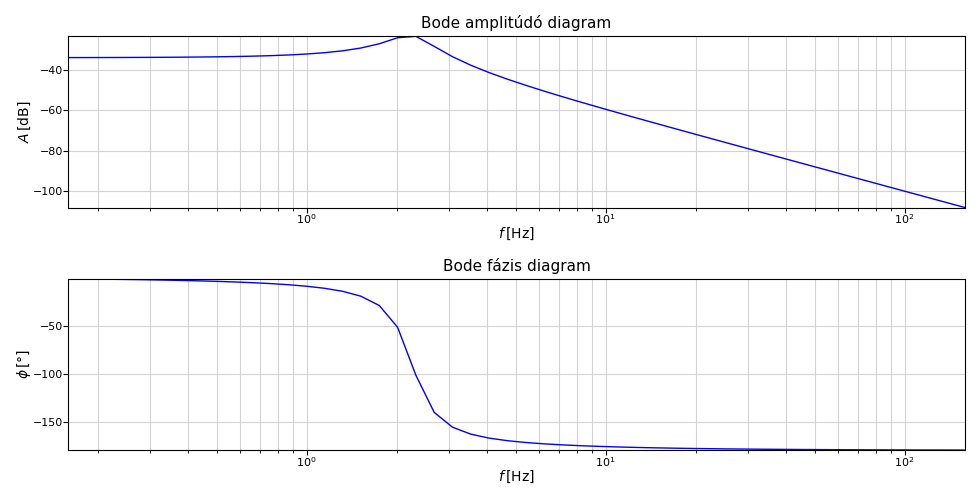

ToggleButtons(description='Rendszer: ', index=6, layout=Layout(width='60%'), options=(('Modell 1', 0), ('Model…

Output()

Output()

In [2]:
# Figure definition

fig1, ((f1_ax1), (f1_ax2)) = plt.subplots(2, 1)
fig1.set_size_inches((9.8, 5))
fig1.set_tight_layout(True)

f1_line1, = f1_ax1.plot([], [])
f1_line2, = f1_ax2.plot([], [])  

f1_ax1.grid(which='both', axis='both', color='lightgray')
f1_ax2.grid(which='both', axis='both', color='lightgray')

f1_ax1.autoscale(enable=True, axis='both', tight=True)
f1_ax2.autoscale(enable=True, axis='both', tight=True)

f1_ax1.set_title('Bode amplitúdó diagram', fontsize=11)
f1_ax1.set_xscale('log')
f1_ax1.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=10)
f1_ax1.set_ylabel(r'$A\/$[dB]', labelpad=0, fontsize=10)
f1_ax1.tick_params(axis='both', which='both', pad=0, labelsize=8)

f1_ax2.set_title('Bode fázis diagram', fontsize=11)
f1_ax2.set_xscale('log')
f1_ax2.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=10)
f1_ax2.set_ylabel(r'$\phi\/$[°]', labelpad=0, fontsize=10)
f1_ax2.tick_params(axis='both', which='both', pad=0, labelsize=8)

# System parameters

def build_base_model(m, k, b):
    
    W_sys = c.tf([1], [m, b, k])
    
    print('Átviteli függvény:')
    print(W_sys)
    
    # System analysis
    
    poles = c.pole(W_sys)     # Poles
    
    print('Pólusok:\n')
    print(poles)
    
    global f1_line1, f1_line2
    
    f1_ax1.lines.remove(f1_line1)
    f1_ax2.lines.remove(f1_line2)
    
    mag, phase, omega = c.bode_plot(W_sys, Plot=False)   # Bode-plot
    
    f1_line1, = f1_ax1.plot(omega/2/np.pi, 20*np.log10(mag), lw=1, color='blue')
    f1_line2, = f1_ax2.plot(omega/2/np.pi, phase*180/np.pi, lw=1, color='blue')   
    
    f1_ax1.relim()
    f1_ax2.relim()
    f1_ax1.autoscale_view()
    f1_ax2.autoscale_view()
    
# GUI widgets

typeSelect = w.ToggleButtons(
    options=[('Modell 1', 0), ('Modell 2', 1), ('Modell 3', 2), ('Modell 4', 3), ('Modell 5', 4), ('Modell 6', 5), ('Demó', -1)],
    value =-1, description='Rendszer: ', layout=w.Layout(width='60%'))

m_slider = w.FloatLogSlider(value=0.5, base=10, min=-3, max=3, description='m [kg] :', continuous_update=False,
                             layout=w.Layout(width='auto', flex='5 5 auto'))
k_slider = w.FloatLogSlider(value=100, base=10, min=-2, max=4, description='k [N/m] :', continuous_update=False,
                             layout=w.Layout(width='auto', flex='5 5 auto'))
b_slider = w.FloatLogSlider(value=50, base=10, min=-2, max=4, description='b [Ns/m] :', continuous_update=False,
                             layout=w.Layout(width='auto', flex='5 5 auto'))

input_data = w.interactive_output(build_base_model, {'m':m_slider, 'k':k_slider, 'b':b_slider})

def update_sliders(index):
    global m_slider, k_slider, b_slider
    
    mval = [0.05, 0.1, 0.25, 0.5, 1, 5, 0.25]
    kval = [1.25, 10, 100, 10, 50, 1000, 50]
    bval = [1, 0.5, 2, 10, 10, 20, 1]
    
    m_slider.value = mval[index]
    k_slider.value = kval[index]
    b_slider.value = bval[index]
    
    if index == -1:
        m_slider.disabled = True
        k_slider.disabled = True
        b_slider.disabled = True
    else:
        m_slider.disabled = False
        k_slider.disabled = False
        b_slider.disabled = False
    
input_data2 = w.interactive_output(update_sliders, {'index':typeSelect})

display(typeSelect, input_data2)
display(w.HBox([m_slider, k_slider, b_slider]), input_data)

A választásától függően a rendszer alul- vagy túlcsillapított.
<br>
<b>Válasszon egy megfelelő szabályozó konfigurációt! Melyik illik a legjobban a rendszerhez? Miért?<br>
Állítsa be úgy a szabályozót, hogy a beállási idő a lehető leggyorsabb legyen, legfeljebb 25% túllövéssel!</b>

Szabadon ki-be kapcsolhatja az I és D tagokat, valamint ha D aktív, alkalmazhat egy egytárolós szűrőt is, ami a deriváló tag időállandójának függvényében adható meg.

<IPython.core.display.Javascript object>


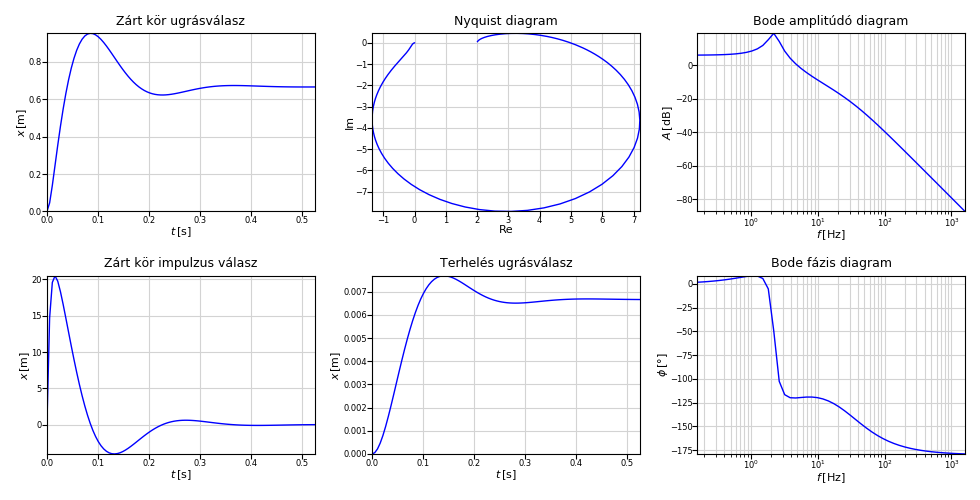

Output()

In [3]:
# PID position control

fig2, ((f2_ax1, f2_ax2, f2_ax3), (f2_ax4, f2_ax5, f2_ax6)) = plt.subplots(2, 3)
fig2.set_size_inches((9.8, 5))
fig2.set_tight_layout(True)

f2_line1, = f2_ax1.plot([], [])
f2_line2, = f2_ax2.plot([], []) 
f2_line3, = f2_ax3.plot([], [])
f2_line4, = f2_ax4.plot([], [])  
f2_line5, = f2_ax5.plot([], [])
f2_line6, = f2_ax6.plot([], [])

f2_ax1.grid(which='both', axis='both', color='lightgray')
f2_ax2.grid(which='both', axis='both', color='lightgray')
f2_ax3.grid(which='both', axis='both', color='lightgray')
f2_ax4.grid(which='both', axis='both', color='lightgray')
f2_ax5.grid(which='both', axis='both', color='lightgray')
f2_ax6.grid(which='both', axis='both', color='lightgray')

f2_ax1.autoscale(enable=True, axis='both', tight=True)
f2_ax2.autoscale(enable=True, axis='both', tight=True)
f2_ax3.autoscale(enable=True, axis='both', tight=True)
f2_ax4.autoscale(enable=True, axis='both', tight=True)
f2_ax5.autoscale(enable=True, axis='both', tight=True)
f2_ax6.autoscale(enable=True, axis='both', tight=True)


f2_ax1.set_title('Zárt kör ugrásválasz', fontsize=9)
f2_ax1.set_xlabel(r'$t\/$[s]', labelpad=0, fontsize=8)
f2_ax1.set_ylabel(r'$x\/$[m]', labelpad=0, fontsize=8)
f2_ax1.tick_params(axis='both', which='both', pad=0, labelsize=6)

f2_ax2.set_title('Nyquist diagram', fontsize=9)
f2_ax2.set_xlabel(r'Re', labelpad=0, fontsize=8)
f2_ax2.set_ylabel(r'Im', labelpad=0, fontsize=8)
f2_ax2.tick_params(axis='both', which='both', pad=0, labelsize=6)

f2_ax3.set_title('Bode amplitúdó diagram', fontsize=9)
f2_ax3.set_xscale('log')
f2_ax3.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=8)
f2_ax3.set_ylabel(r'$A\/$[dB]', labelpad=0, fontsize=8)
f2_ax3.tick_params(axis='both', which='both', pad=0, labelsize=6)

f2_ax4.set_title('Zárt kör impulzus válasz', fontsize=9)
f2_ax4.set_xlabel(r'$t\/$[s]', labelpad=0, fontsize=8)
f2_ax4.set_ylabel(r'$x\/$[m]', labelpad=0, fontsize=8)
f2_ax4.tick_params(axis='both', which='both', pad=0, labelsize=6)

f2_ax5.set_title('Terhelés ugrásválasz', fontsize=9)
f2_ax5.set_xlabel(r'$t\/$[s]', labelpad=0, fontsize=8)
f2_ax5.set_ylabel(r'$x\/$[m]', labelpad=0, fontsize=8)
f2_ax5.tick_params(axis='both', which='both', pad=0, labelsize=6)

f2_ax6.set_title('Bode fázis diagram', fontsize=9)
f2_ax6.set_xscale('log')
f2_ax6.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=8)
f2_ax6.set_ylabel(r'$\phi\/$[°]', labelpad=0, fontsize=8)
f2_ax6.tick_params(axis='both', which='both', pad=0, labelsize=6)

def position_control(Kp, Ti, Td, Fd, Ti0, Td0, Fd0, m, k, b):
    
    W_sys = c.tf([1], [m, b, k])
    
    # PID Controller
    
    P = Kp             # Proportional term
    I = Kp / Ti        # Integral term
    D = Kp * Td        # Derivative term
    Td_f = Td / Fd     # Derivative term filter
    
    W_PID = c.parallel(c.tf([P], [1]),
                       c.tf([I * Ti0], [1 * Ti0, 1 * (not Ti0)]),
                       c.tf([D * Td0, 0], [Td_f * Td0 * Fd0, 1]))  # PID controller in time constant format
    
    W_open = c.series(W_PID, W_sys)         # Open loop with two integrators added for position output
    W_closed = c.feedback(W_open, 1, -1)    # Closed loop with negative feedback
    
    W_load = c.feedback(W_sys, W_PID, -1)   # Transfer function of the load based errors  
                        
    # Display
                        
    global f2_line1, f2_line2, f2_line3, f2_line4, f2_line5, f2_line6
    
    f2_ax1.lines.remove(f2_line1)
    f2_ax2.lines.remove(f2_line2)
    f2_ax3.lines.remove(f2_line3)
    f2_ax4.lines.remove(f2_line4)
    f2_ax5.lines.remove(f2_line5)
    f2_ax6.lines.remove(f2_line6)
    
    tout, yout = c.step_response(W_closed)
    f2_line1, = f2_ax1.plot(tout, yout, lw=1, color='blue') 
    
    _, _, ob = c.nyquist_plot(W_open, Plot=False)   # Small resolution plot to determine bounds        
    real, imag, freq = c.nyquist_plot(W_open, omega=np.logspace(np.log10(ob[0]), np.log10(ob[-1]), 1000), Plot=False)
    f2_line2, = f2_ax2.plot(real, imag, lw=1, color='blue')
    
    mag, phase, omega = c.bode_plot(W_open, Plot=False)
    f2_line3, = f2_ax3.plot(omega/2/np.pi, 20*np.log10(mag), lw=1, color='blue')
    f2_line6, = f2_ax6.plot(omega/2/np.pi, phase*180/np.pi, lw=1, color='blue')

    tout, yout = c.impulse_response(W_closed)
    f2_line4, = f2_ax4.plot(tout, yout, lw=1, color='blue')   

    tout, yout = c.step_response(W_load)
    f2_line5, = f2_ax5.plot(tout, yout, lw=1, color='blue')
    
    f2_ax1.relim()
    f2_ax2.relim()
    f2_ax3.relim()
    f2_ax4.relim()
    f2_ax5.relim()
    f2_ax6.relim()
    f2_ax1.autoscale_view()
    f2_ax2.autoscale_view()
    f2_ax3.autoscale_view()
    f2_ax4.autoscale_view()
    f2_ax5.autoscale_view()
    f2_ax6.autoscale_view()
    
def update_controller(index):
    global Kp_slider, Ti_slider, Td_slider, Fd_slider, Ti_button, Td_button, Fd_button
    
    if index == -1:
        Kp_slider.value = 100
        Td_slider.value = 0.05
        Fd_slider.value = 10
        Ti_button.value = False
        Td_button.value = True
        Fd_button.value = True
        
        Kp_slider.disabled = True
        Ti_slider.disabled = True
        Td_slider.disabled = True
        Fd_slider.disabled = True
        Ti_button.disabled = True
        Td_button.disabled = True
        Fd_button.disabled = True
    else:
        Kp_slider.disabled = False
        Ti_slider.disabled = False
        Td_slider.disabled = False
        Fd_slider.disabled = False
        Ti_button.disabled = False
        Td_button.disabled = False
        Fd_button.disabled = False
    
# GUI widgets

Kp_slider = w.FloatLogSlider(value=0.5, base=10, min=-1, max=4, description='Kp:', continuous_update=False,
                             layout=w.Layout(width='auto', flex='5 5 auto'))
Ti_slider = w.FloatLogSlider(value=0.0035, base=10, min=-4, max=1, description='', continuous_update=False,
                             layout=w.Layout(width='auto', flex='5 5 auto'))
Td_slider = w.FloatLogSlider(value=1, base=10, min=-4, max=1, description='', continuous_update=False,
                             layout=w.Layout(width='auto', flex='5 5 auto'))
Fd_slider = w.FloatLogSlider(value=1, base=10, min=0, max=3, description='', continuous_update=False,
                             layout=w.Layout(width='auto', flex='5 5 auto'))

Ti_button = w.ToggleButton(value=True, description='Ti',
                           layout=w.Layout(width='auto', flex='1 1 0%'))
Td_button = w.ToggleButton(value=False, description='Td',
                           layout=w.Layout(width='auto', flex='1 1 0%'))
Fd_button = w.ToggleButton(value=False, description='Fd',
                           layout=w.Layout(width='auto', flex='1 1 0%'))

input_data = w.interactive_output(position_control, {'Kp': Kp_slider, 'Ti': Ti_slider, 'Td': Td_slider,
                                                 'Fd': Fd_slider, 'Ti0' : Ti_button, 'Td0': Td_button,
                                                 'Fd0': Fd_button, 'm':m_slider, 'k':k_slider, 'b':b_slider})

w.interactive_output(update_controller, {'index': typeSelect})

display(w.HBox([Kp_slider, Ti_button, Ti_slider, Td_button, Td_slider, Fd_button, Fd_slider]), input_data)

Az alábbi szimuláció segítségével megfigyelheti a rendszer mozgását a az aktuális beállításnak megfelelően. Beállíthat különböző referencia jeleket és zavarást a rendszer viselkedésének vizsgálatához.

<b>Megfelelő a szabályozó beállítása jelkövetéshez? Módosítsa a szabályozót, hogy az elfogadható minőségben kövessen egy szinusz jelet!</b>
<br><br>
<i>(Az animációk a kerethez vannak igazítva, hogy a teljes szimulációs idő alatt határon belül maradjanak. Ennek köszönhetően az instabil megoldások mozdulatlannak tűnhetnek az utolsó pillanatig.)</i>

<IPython.core.display.Javascript object>


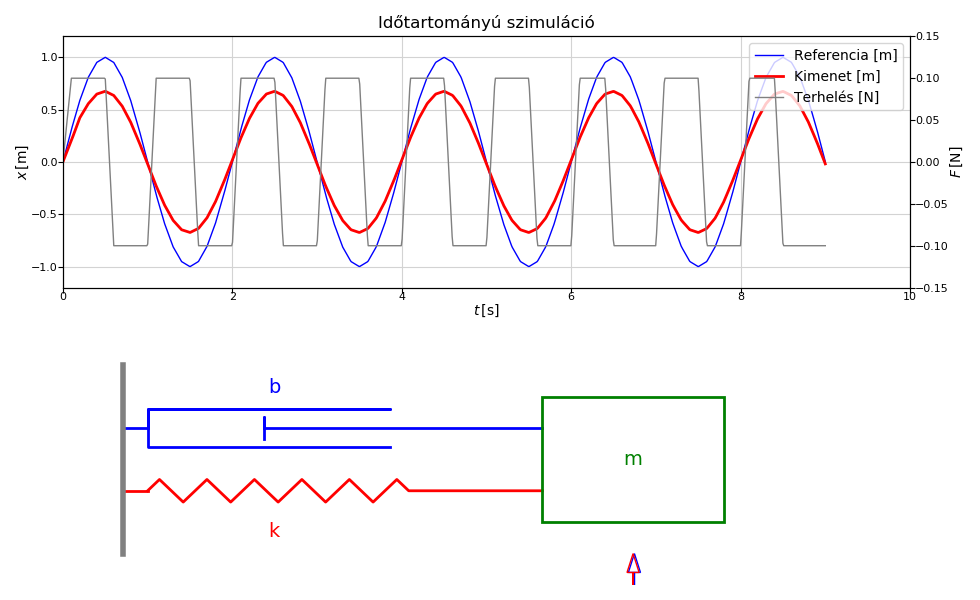

Output()

In [4]:
# Simulation data

anim_fig = plt.figure()
anim_fig.set_size_inches((9.8, 6))
anim_fig.set_tight_layout(True)

anim_ax1 = anim_fig.add_subplot(211)
anim_ax2 = anim_ax1.twinx()

frame_count=1000

l1 = anim_ax1.plot([], [], lw=1, color='blue')
l2 = anim_ax1.plot([], [], lw=2, color='red')
l3 = anim_ax2.plot([], [], lw=1, color='grey')

line1 = l1[0]
line2 = l2[0]
line3 = l3[0]

anim_ax1.legend(l1+l2+l3, ['Referencia [m]', 'Kimenet [m]', 'Terhelés [N]'], loc=1)

anim_ax1.set_title('Időtartományú szimuláció', fontsize=12)
anim_ax1.set_xlabel(r'$t\/$[s]', labelpad=0, fontsize=10)
anim_ax1.set_ylabel(r'$x\/$[m]', labelpad=0, fontsize=10)
anim_ax1.tick_params(axis='both', which='both', pad=0, labelsize=8)
anim_ax2.set_ylabel(r'$F\/$[N]', labelpad=0, fontsize=10)
anim_ax2.tick_params(axis='both', which='both', pad=0, labelsize=8)

anim_ax1.grid(which='both', axis='both', color='lightgray')

T_plot = []
X_plot = []
L_plot = []
R_plot = []

# Scene data

scene_ax = anim_fig.add_subplot(212)
scene_ax.set_xlim((-3, 4))
scene_ax.set_ylim((-0.5, 1.5))
scene_ax.axis('off')

scene_ax.plot([-2.5, -2.3, -2.3, -0.3, -2.3, -2.3, -0.3], [0.75, 0.75, 0.9, 0.9, 0.9, 0.6, 0.6], lw=2, color='blue', zorder=0)
scene_ax.plot([-2.5, -2.3], [0.25, 0.25], lw=2, color='red', zorder=0)
scene_ax.plot([-2.5, -2.5], [1.25, -0.25], lw=4, color='gray', zorder=2)

scene_ax.text(-1.3, 1, 'b', fontsize=14, color='blue', va='bottom', zorder=5)
scene_ax.text(-1.3, 0, 'k', fontsize=14, color='red', va='top', zorder=5)

b_line, = scene_ax.plot([], [], lw=2, color='blue')
k_line, = scene_ax.plot([], [], lw=2, color='red')

m_text = scene_ax.text(1.75, 0.5, 'm', fontsize=14, color='green', va='center', ha='center', zorder=5)
m_box = patches.Rectangle((1, 0), 1.5, 1, lw=2, color='green', fill=False, zorder=10)
scene_ax.add_patch(m_box)

x_arrow = scene_ax.arrow(1.75, -0.5, 0, 0.25, color='blue', head_width=0.1,
                         length_includes_head=True, lw=1, fill=False, zorder=5)
r_arrow = scene_ax.arrow(1.75, -0.5, 0, 0.25, color='red', head_width=0.1,
                         length_includes_head=True, lw=1, fill=False, zorder=5)
base_arrow = x_arrow.xy

pos_var = []
ref_var = []

#Simulation function

def simulation(Kp, Ti, Td, Fd, Ti0, Td0, Fd0, m, k, b, T, dt, X, Xf, Xa, Xo, L, Lf, La, Lo):
    
    # Controller
    P = Kp            # Proportional term
    I = Kp / Ti       # Integral term
    D = Kp * Td       # Derivative term
    Td_f = Td / Fd    # Derivative term filter
    
    W_PID = c.parallel(c.tf([P], [1]),
                       c.tf([I * Ti0], [1 * Ti0, 1 * (not Ti0)]),
                       c.tf([D * Td0, 0], [Td_f * Td0 * Fd0, 1]))    # PID controller
    
    # System
    W_sys = c.tf([1], [m, b, k])
    
    # Model
    W_open = c.series(W_PID, W_sys)         # Open loop with two integrators added for position output
    W_closed = c.feedback(W_open, 1, -1)    # Closed loop with negative feedback
    
    W_load = c.feedback(W_sys, W_PID, -1)   # Transfer function of the load based errors  
    
    # Reference and disturbance signals

    T_sim = np.arange(0, T, dt, dtype=np.float64)
    
    if X == 0:     # Constant reference
        X_sim = np.full_like(T_sim, Xa * Xo)
    elif X == 1:   # Sine wave reference
        X_sim = (np.sin(2 * np.pi * Xf * T_sim) + Xo) * Xa
    elif X == 2:   # Square wave reference
        X_sim = (np.sign(np.sin(2 * np.pi * Xf * T_sim)) + Xo) * Xa
        
    if L == 0:     # Constant load
        L_sim = np.full_like(T_sim, La * Lo)
    elif L == 1:   # Sine wave load
        L_sim = (np.sin(2 * np.pi * Lf * T_sim) + Lo) * La
    elif L == 2:   # Square wave load
        L_sim = (np.sign(np.sin(2 * np.pi * Lf * T_sim)) + Lo) * La
    elif L_type.value == 3:   # Noise form load
        L_sim = np.interp(T_sim, np.linspace(0, T, int(T * Lf) + 2),
                          np.random.normal(loc=(Lo * La), scale=La, size=int(T * Lf) + 2))
    
    # System response
        
    Tx, youtx, xoutx = c.forced_response(W_closed, T_sim, X_sim)
    Tl, youtl, xoutl = c.forced_response(W_load, T_sim, L_sim)
    R_sim = np.nan_to_num(youtx + youtl)
    
    # Display
    
    XR_max = max(np.amax(np.absolute(np.concatenate((X_sim, R_sim)))), Xa)
    L_max = max(np.amax(np.absolute(L_sim)), La)
    
    anim_ax1.set_xlim((0, T))
    anim_ax1.set_ylim((-1.2 * XR_max, 1.2 * XR_max))
    anim_ax2.set_ylim((-1.5 * L_max, 1.5 * L_max))
    
    global T_plot, X_plot, L_plot, R_plot, pos_var, ref_var
    
    T_plot = np.linspace(0, T, frame_count, dtype=np.float32)
    X_plot = np.interp(T_plot, T_sim, X_sim)
    L_plot = np.interp(T_plot, T_sim, L_sim)
    R_plot = np.interp(T_plot, T_sim, R_sim)
    
    pos_var = R_plot/XR_max
    ref_var = X_plot/XR_max
        
def anim_init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    
    b_line.set_data([], [])
    k_line.set_data([], [])
    
    x_arrow.set_xy(base_arrow)
    r_arrow.set_xy(base_arrow)
    
    m_text.set_position((1.75, 0.5))
    m_box.set_xy((1, 0))
    
    return (line1, line2, line3, m_text, m_box, b_line, k_line,)

def animate(i):
    line1.set_data(T_plot[0:i], X_plot[0:i])
    line2.set_data(T_plot[0:i], R_plot[0:i])
    line3.set_data(T_plot[0:i], L_plot[0:i])
    
    b_line.set_data([-1.3, -1.3, -1.3, 1]+pos_var[i], [0.66, 0.84, 0.75, 0.75])
    k_line.set_data(np.append(np.array([0, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 22])*(pos_var[i]+2)/20-2.3, pos_var[i]+1),
                    [0.25, 0.34, 0.16, 0.34, 0.16, 0.34, 0.16, 0.34, 0.16, 0.34, 0.16, 0.34, 0.25, 0.25])
    
    x_arrow.set_xy(base_arrow+[ref_var[i], 0])
    r_arrow.set_xy(base_arrow+[pos_var[i], 0])
    
    m_text.set_position((pos_var[i]+1.75, 0.5))
    m_box.set_x(pos_var[i]+1)
    
    return (line1, line2, line3, m_text, m_box, b_line, k_line,)

anim = animation.FuncAnimation(anim_fig, animate, init_func=anim_init,
                               frames=frame_count, interval=10, blit=True,
                               repeat=True)

# Controllers

T_slider = w.FloatLogSlider(value=10, base=10, min=-0.7, max=1, step=0.01,
                            description='Hossz [s]:', continuous_update=False,
                            orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))

dt_slider = w.FloatLogSlider(value=0.1, base=10, min=-3, max=-1, step=0.01,
                             description='Lépésköz [s]:', continuous_update=False,
                             orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))
       
X_type = w.Dropdown(options=[('Állandó', 0), ('Szinusz', 1), ('Négyszög', 2)], value=1,
                     description='Referencia: ', continuous_update=False, layout=w.Layout(width='auto', flex='3 3 auto'))    
Xf_slider = w.FloatLogSlider(value=0.5, base=10, min=-2, max=2, step=0.01,
                             description='Frekvencia [Hz]:', continuous_update=False,
                             orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))
Xa_slider = w.FloatLogSlider(value=1, base=10, min=-2, max=2, step=0.01,
                             description='Amplitúdó [m]:', continuous_update=False,
                             orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))
Xo_slider = w.FloatSlider(value=0, min=-10, max=10, description='Offszet/Ampl:', continuous_update=False,
                              orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))    
    
L_type = w.Dropdown(options=[('Állandó', 0), ('Szinusz', 1), ('Négyszög', 2), ('Zaj', 3)], value=2,
                     description='Terhelés: ', continuous_update=False, layout=w.Layout(width='auto', flex='3 3 auto'))    
Lf_slider = w.FloatLogSlider(value=1, base=10, min=-2, max=2, step=0.01,
                             description='Frekvencia [Hz]:', continuous_update=False,
                             orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))
La_slider = w.FloatLogSlider(value=0.1, base=10, min=-2, max=2, step=0.01,
                             description='Amplitúdó [N]:', continuous_update=False,
                             orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))
Lo_slider = w.FloatSlider(value=0, min=-10, max=10, description='Offszet/Ampl:', continuous_update=False,
                              orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))

input_data = w.interactive_output(simulation, {'Kp': Kp_slider, 'Ti': Ti_slider, 'Td': Td_slider,
                                               'Fd': Fd_slider, 'Ti0' : Ti_button, 'Td0': Td_button,
                                               'Fd0': Fd_button,
                                               'm':m_slider, 'k':k_slider, 'b':b_slider,
                                               'T': T_slider, 'dt': dt_slider,
                                               'X': X_type, 'Xf': Xf_slider, 'Xa': Xa_slider, 'Xo': Xo_slider,
                                               'L': L_type, 'Lf': Lf_slider, 'La': La_slider, 'Lo': Lo_slider})

display(w.HBox([w.HBox([T_slider, dt_slider], layout=w.Layout(width='25%')),
                w.Box([], layout=w.Layout(width='5%')),
                w.VBox([X_type, w.HBox([Xf_slider, Xa_slider, Xo_slider])], layout=w.Layout(width='30%')),
                w.Box([], layout=w.Layout(width='5%')),
                w.VBox([L_type, w.HBox([Lf_slider, La_slider, Lo_slider])], layout=w.Layout(width='30%'))],
                layout=w.Layout(width='100%', justify_content='center')), input_data)


A hossz paraméter a szimulált időtartamot szabályozza és nincsen hatással a szimuláció futási időtartamára. Ezzel szemben a lépésköz a mintavételezés sűrűségét befolyásolja, finomíthatja az eredmények megjelenését, de jelentősen megnöveli a szükséges számítási teljesítményt.